<a href="https://colab.research.google.com/github/SumiaAlbalushi/Data.Code/blob/main/Use_case_CNN_Classification_Tiny_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use case: CNN Classification - ImageNet

---



 image classification using Convolutional Neural Networks (CNNs). We'll use the Tiny ImageNet dataset, which contains 8,000 64x64 color images in 10 classes, with 4,000 images per class. There are 50,000 training images and 5,000 test images.

To download the Tiny ImageNet dataset from Kaggle, you will first need to install the Kaggle API. In a Colab notebook, you can do it as follows:

In [1]:
!pip install kaggle

Next, you need to upload your Kaggle API token. If you don't have one, you can download it from your Kaggle account page (under "API").

In [2]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


Now you can download the Tiny ImageNet dataset. Here is the command you would use to download the dataset:

In [3]:
!kaggle datasets download -d chetankv/dogs-cats-images

100% 433M/435M [00:19<00:00, 22.4MB/s]
100% 435M/435M [00:19<00:00, 23.2MB/s]


After downloading the dataset, you can unzip it as follows:

In [4]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

## oad the Training and Validation Data

You can use the image_dataset_from_directory function from tensorflow.keras.preprocessing to load the data:

In [5]:
# Define directories
root_dir = '/content/dog vs cat/dataset/'
train_dir = '/content/dog vs cat/dataset/training_set'
val_dir = '/content/dog vs cat/dataset/test_set'


In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(train_dir, image_size=(64, 64), batch_size=32)
val_dataset = image_dataset_from_directory(val_dir, image_size=(64, 64), batch_size=32)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Exploratory Data Analysis (EDA)
Performing Exploratory Data Analysis (EDA) on image datasets like Tiny ImageNet involves understanding the distribution of classes, visualizing some samples from each class, and potentially checking the color distribution and size of the images.

Performing an Exploratory Data Analysis (EDA) on your dataset provides several benefits, especially when working on a classification problem like cats vs dogs:

* Understanding the data distribution: Visualizing the number of samples in each class helps to identify if there's an imbalance in the dataset. In real-world scenarios, datasets often have imbalanced classes, which can impact the performance of machine learning algorithms. They tend to show a bias towards the majority class, leading to inaccurate predictions for the minority class. If you find that your dataset is imbalanced, you can apply techniques like oversampling, undersampling, or SMOTE to make it balanced.

* Analyzing image dimensions: Understanding the dimensions of the images in your dataset is important because it can impact how you preprocess your images. If your images are of different sizes, you'll need to resize them so they're all the same size before you can feed them into your machine learning model. Also, very large images may need to be downscaled to prevent out-of-memory errors and to speed up training.

* Color distribution: Understanding the color distribution in your images can help you decide whether to use color or grayscale images in your model. If color plays an important role in distinguishing between cats and dogs, then you might want to use color images in your model. On the other hand, if color isn't important, then you might want to convert your images to grayscale, which can simplify your model and speed up training.

* Visualizing samples: Displaying a sample image from each class can help you understand what your raw data looks like and whether any preprocessing steps (like resizing, cropping, or normalization) might be needed.

* Identifying potential issues: EDA can help you identify potential issues in your dataset, such as missing data, duplicate data, or incorrect labels, that could negatively impact your model's performance.


Number of classes: 2
Number of images per class: 4000 - 4000


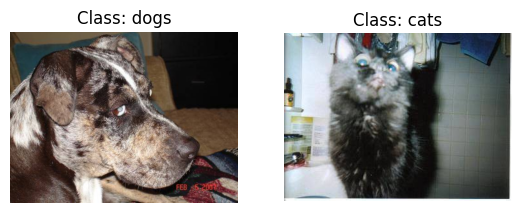

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Get class names
class_names = os.listdir(train_dir)
print(f"Number of classes: {len(class_names)}")

# Count number of images per class
class_counts = {}
for class_name in class_names:
    class_counts[class_name] = len(os.listdir(os.path.join(train_dir, class_name)))

# Display the number of images per class
print(f"Number of images per class: {min(class_counts.values())} - {max(class_counts.values())}")

# Display some samples from the dataset
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    plt.subplot(3, 3, i + 1)
    img_class = class_names[i]
    img_dir = os.path.join(train_dir, img_class)
    img_name = os.listdir(img_dir)[0]
    img = Image.open(os.path.join(img_dir, img_name))
    plt.imshow(img)
    plt.title(f"Class: {img_class}")
    plt.axis("off")
plt.show()

### Check for imbalance in the dataset

Imbalance in the dataset can lead to poor model performance, as the model might overfit to the majority class. We've already calculated the number of images per class, but we can also visualize this information:

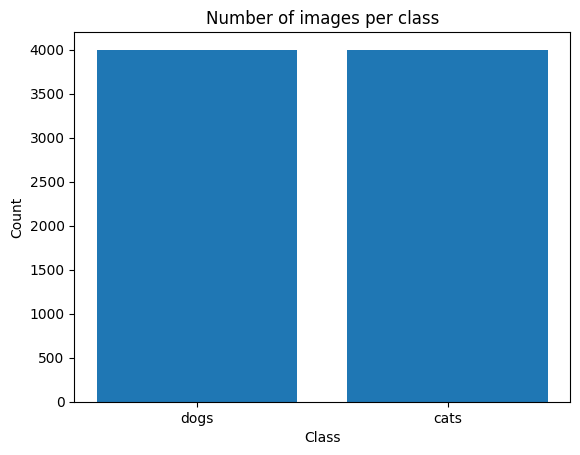

In [8]:
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Number of images per class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Analyze image dimensions

Some datasets may have images of varying dimensions. Understanding these dimensions can be crucial when designing the input layer of your model:

In [9]:
import numpy as np
image_dims = []

for class_name in class_names:
    img_dir = os.path.join(train_dir, class_name)
    for img_name in os.listdir(img_dir):
        img = Image.open(os.path.join(img_dir, img_name))
        image_dims.append(img.size)

# Convert to a numpy array and calculate stats
image_dims = np.array(image_dims)
print(f'Image dimensions: min={np.min(image_dims, axis=0)}, max={np.max(image_dims, axis=0)}, avg={np.mean(image_dims, axis=0)}')

Image dimensions: min=[57 41], max=[1050  768], avg=[403.801 360.472]


### Analyzing color distribution

Understanding the color distribution of your images can provide insights into whether color-based features might be important:

In [10]:
color_data = []

# Use a sample of images, otherwise it may take a long time
sample_size = 100

for class_name in class_names:
    img_dir = os.path.join(train_dir, class_name)
    img_names = os.listdir(img_dir)
    np.random.shuffle(img_names)
    for img_name in img_names[:sample_size]:
        img = Image.open(os.path.join(img_dir, img_name))
        color_data.extend(np.array(img).reshape(-1, 3))

# Convert to a numpy array
color_data = np.array(color_data)

# Calculate color stats
print(f"Color data: min={np.min(color_data, axis=0)}, max={np.max(color_data, axis=0)}, avg={np.mean(color_data, axis=0)}")

Color data: min=[0 0 0], max=[255 255 255], avg=[122.15226438 114.43927041 104.99381902]


## Data Preprocessing

The image_dataset_from_directory function already takes care of resizing the images. However, you might want to normalize the pixel values to the range [0, 1]:

In [11]:
import tensorflow as tf

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_dataset.map(lambda x, y: (normalization_layer(x), y))

## Model Building



In [12]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [13]:
# Define a data generator to handle data preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0,1]
    shear_range=0.2,       # Randomly applies shearing transformation
    zoom_range=0.2,        # Randomly zooms in the image
    horizontal_flip=True)  # Randomly flips the image horizontally

test_datagen = ImageDataGenerator(rescale=1./255) # For validation/test data, only rescaling is needed

# Use the data generator to load data from directories
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # All images will be resized to 64x64
    batch_size=32,
    class_mode='binary')   # Since we use binary_crossentropy loss, we need binary labels

val_set = test_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Convolutional Neural Network (CNN) with multiple convolution and pooling layers, dropout for regularization, and a larger fully connected layer before the final output layer.

This model uses two sets of Conv2D, MaxPooling2D, and Dropout layers, followed by a larger Dense layer. The Dropout layers are used for regularization and help to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# First Convolution Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout regularization

# Second Convolution Layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout regularization

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout regularization

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

visualize the architecture of your model using the plot_model function from keras.utils

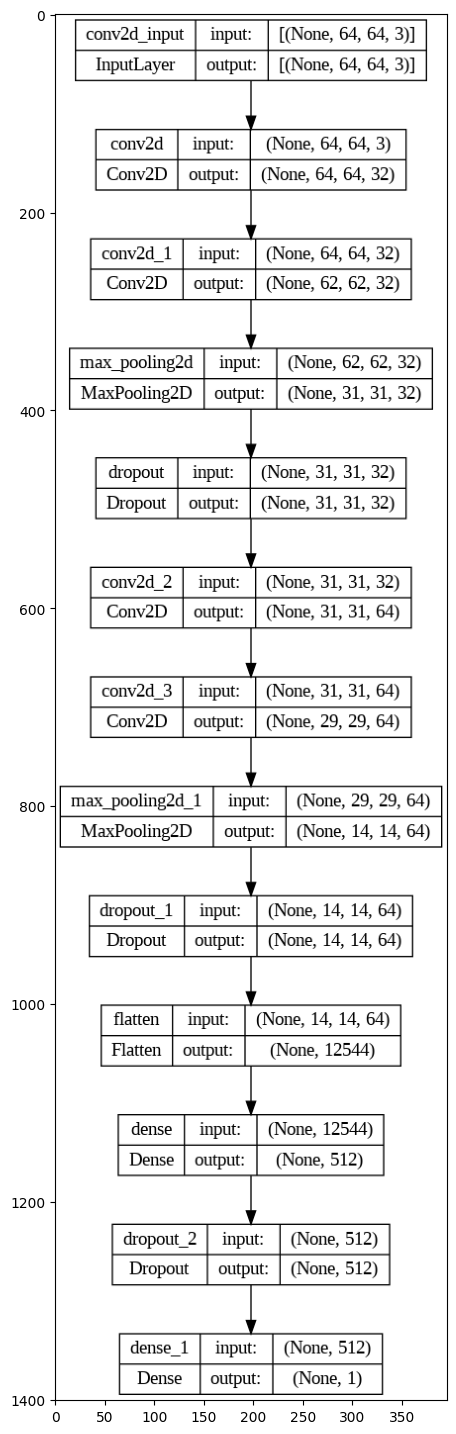

In [17]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the image
img = mpimg.imread('model.png')
plt.figure(figsize=(10,18))
imgplot = plt.imshow(img)
plt.show()

In [18]:
# Fit the model and save the history
history= model.fit(train_set
          , steps_per_epoch=800
          , epochs=30
          , validation_data=val_set
          , validation_steps=500)

Epoch 1/30
250/800 [========>.....................] - ETA: 46s - loss: 0.6999 - accuracy: 0.5102

800/800 [==============================] - 40s 33ms/step - loss: 0.6999 - accuracy: 0.5102 - val_loss: 0.6925 - val_accuracy: 0.5005


## Evaluation

### Plotting Training and Validation Accuracy and Loss Over Epochs

You can plot the training and validation accuracy and loss over epochs to visualize how your model is learning

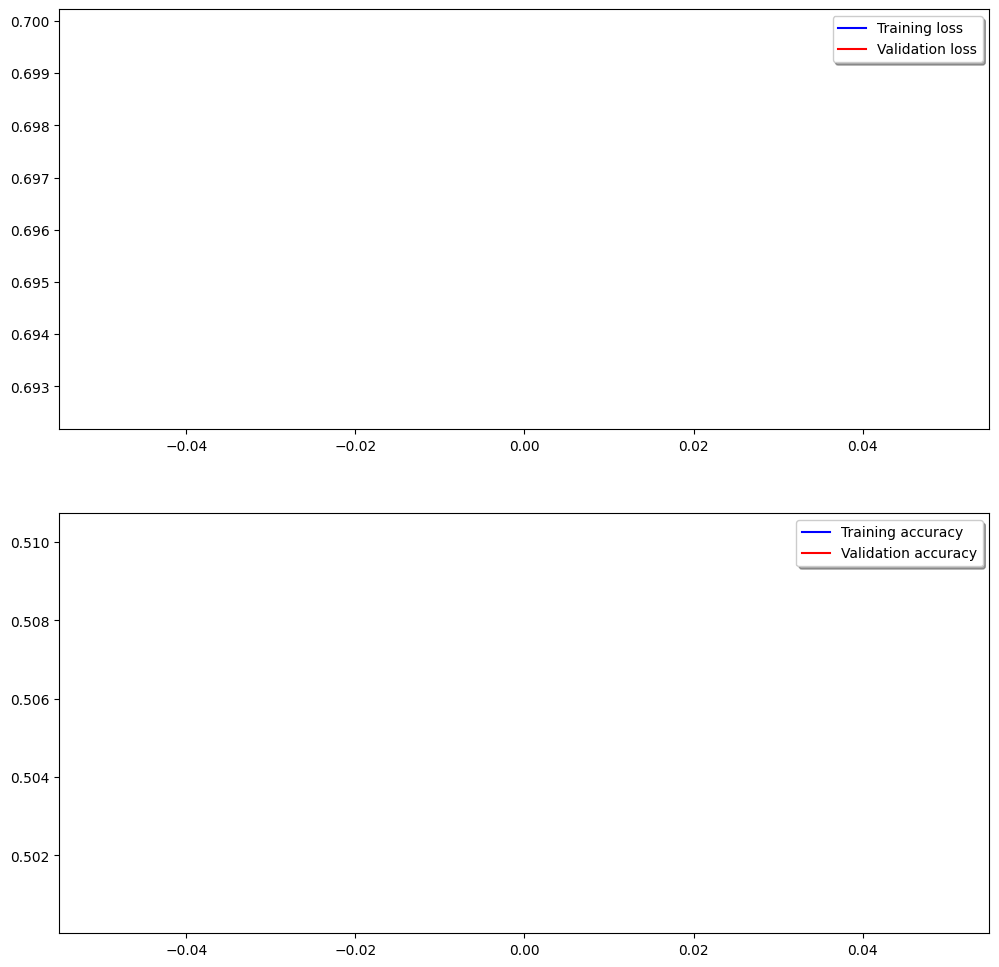

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Confusion Matrix

A confusion matrix is a table layout that allows visualization of the performance of an algorithm. It's extremely useful for measuring Recall, Precision, F1-Score and AUC-ROC Curve.

63/63 [==============================] - 5s 70ms/step


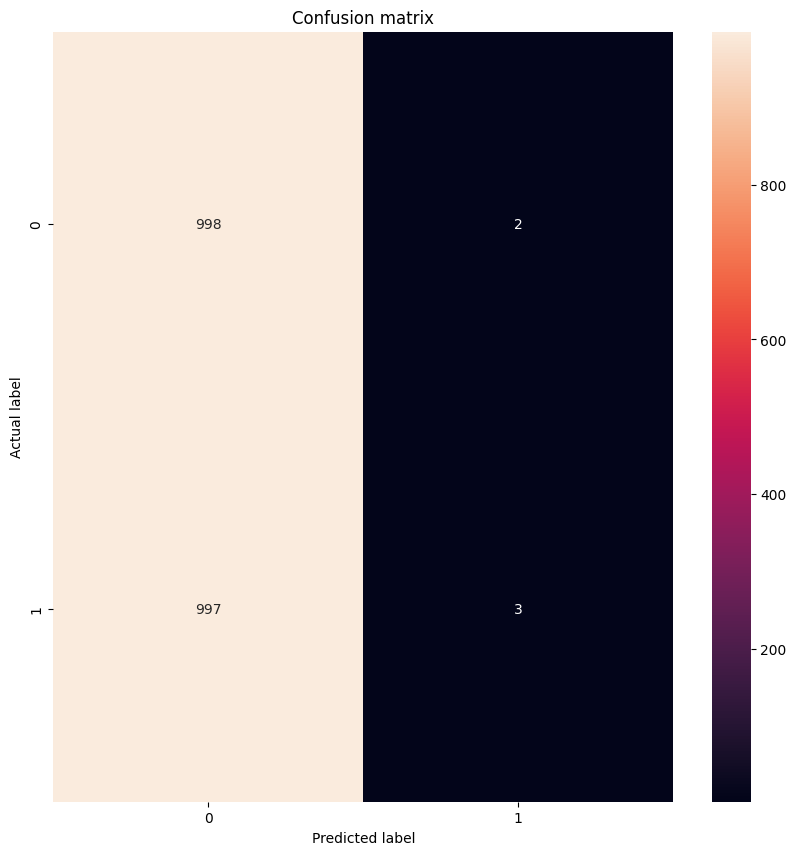

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the model predictions
predictions = model.predict(val_set)
y_pred = [1 * (x[0]>=0.5) for x in predictions]

# Get the actual labels
y_true = val_set.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Classification Report

A Classification report is used to measure the quality of predictions from a classification algorithm. It shows precision, recall, F1-Score, and support for each class.

In [21]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.60      0.00      0.01      1000

    accuracy                           0.50      2000
   macro avg       0.55      0.50      0.34      2000
weighted avg       0.55      0.50      0.34      2000



 visualize some predictions on the validation set. We'll plot the images along with their true labels and predicted labels.

1/1 [==============================] - 0s 103ms/step


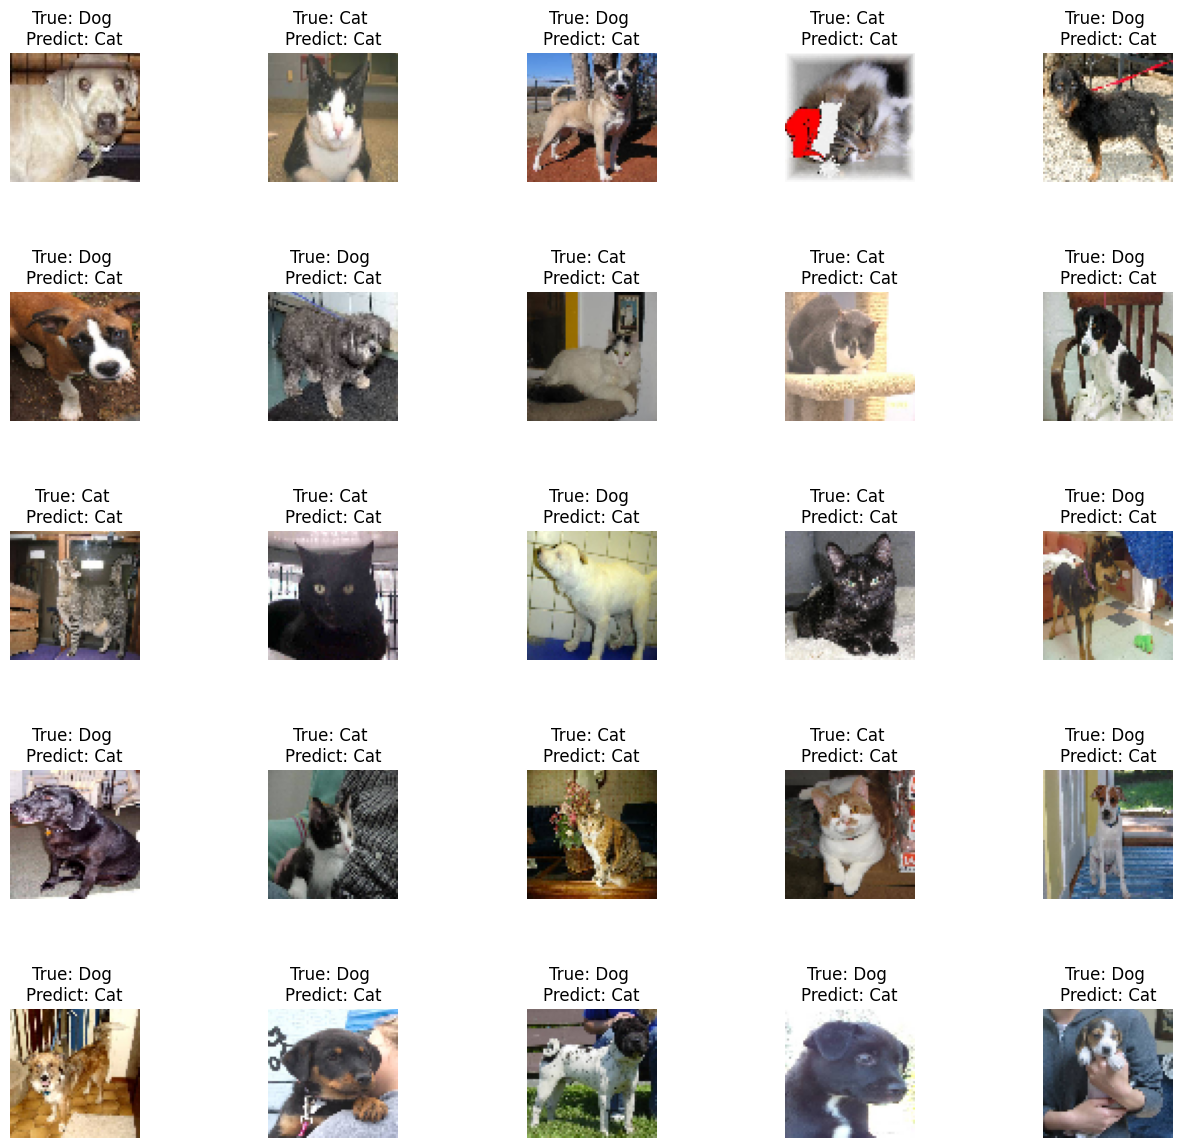

In [22]:
# Get a batch of data from the validation set
x_val_sample, y_val_sample = next(iter(val_set))

# Make predictions on the sample
y_pred_sample = model.predict(x_val_sample)
y_pred_sample_classes = [1 * (x[0]>=0.5) for x in y_pred_sample]

# Define class labels
class_labels = ['Cat', 'Dog']

# Plot the images, true labels, and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_val_sample[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_labels[int(y_val_sample[i])], class_labels[y_pred_sample_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

This script gets a batch of images and labels from the validation set, makes predictions on these images, and then plots the images along with the true and predicted labels.